<a href="https://colab.research.google.com/github/segadamyan/Driver-Drowsiness-Detection/blob/main/Driver_drowsiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Driver drowsiness/train'
labels = os.listdir(data_path)

In [ ]:
print(labels)

['Closed', 'Open']


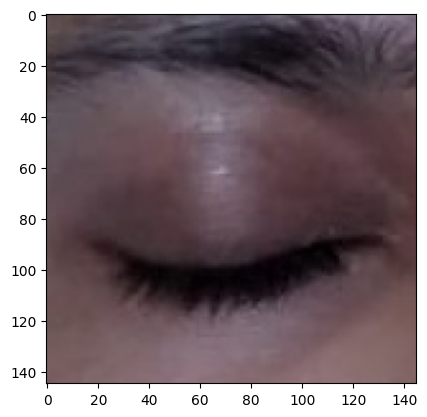

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(f"{data_path}/Closed/_0.jpg"))

In [ ]:
plt.imread(f"{data_path}/Closed/_1.jpg").shape

(135, 142, 3)

In [ ]:
BATCH_SIZE = 32
img_height = 244
img_width = 244

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_path,
    validation_split = 0.1,
    subset = 'training',
    label_mode = 'categorical',
    image_size = (img_height, img_width),
    batch_size = BATCH_SIZE,
    seed = 1)

Found 1452 files belonging to 2 classes.
Using 1307 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_path,
    validation_split = 0.1,
    subset = 'validation',
    label_mode = 'categorical',
    image_size = (img_height, img_width),
    batch_size = BATCH_SIZE,
    seed = 1)

Found 1452 files belonging to 2 classes.
Using 145 files for validation.


TypeError: ignored

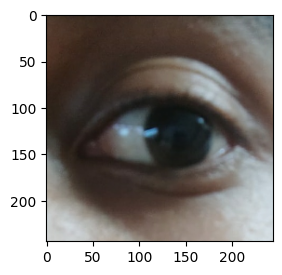

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(len(labels)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(labels[np.argmax(labels[i])])
        plt.axis("off")

In [ ]:
data_augmentation = tf.keras.Sequential([
    #layers.CenterCrop(125, 125),
    tf.keras.layers.RandomFlip('horizontal', input_shape = (img_height, img_width, 3)),
    tf.keras.layers.RandomRotation(0.5, fill_mode = 'nearest'),
    tf.keras.layers.RandomZoom(0.4),
])

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

In [ ]:
IMG_SHAPE = (img_height, img_width, 3)

In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=IMG_SHAPE))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(2, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 242, 242, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 121, 121, 256)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 59, 59, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)       

In [ ]:
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
41/41 [==============================] - 110s 2s/step - loss: 2.3696 - accuracy: 0.6963 - val_loss: 0.3367 - val_accuracy: 0.9241
Epoch 2/50
41/41 [==============================] - 10s 234ms/step - loss: 0.2715 - accuracy: 0.9036 - val_loss: 0.2519 - val_accuracy: 0.8828
Epoch 3/50
41/41 [==============================] - 10s 235ms/step - loss: 0.2391 - accuracy: 0.9135 - val_loss: 0.1990 - val_accuracy: 0.9172
Epoch 4/50
41/41 [==============================] - 10s 234ms/step - loss: 0.1853 - accuracy: 0.9388 - val_loss: 0.1152 - val_accuracy: 0.9586
Epoch 5/50
41/41 [==============================] - 10s 236ms/step - loss: 0.1822 - accuracy: 0.9426 - val_loss: 0.1404 - val_accuracy: 0.9517
Epoch 6/50
41/41 [==============================] - 10s 235ms/step - loss: 0.2241 - accuracy: 0.9288 - val_loss: 0.2813 - val_accuracy: 0.9517
Epoch 7/50
41/41 [==============================] - 10s 235ms/step - loss: 0.2015 - accuracy: 0.9319 - val_loss: 0.1415 - val_accuracy: 0.9448
E

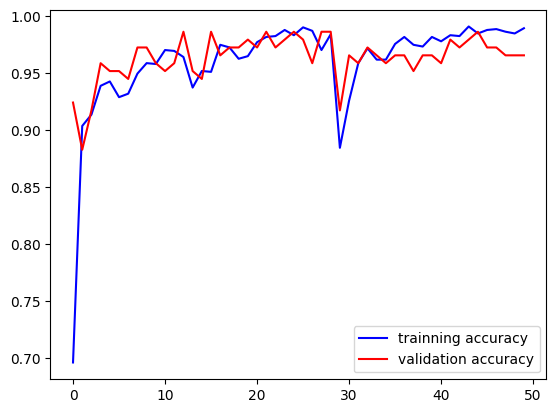

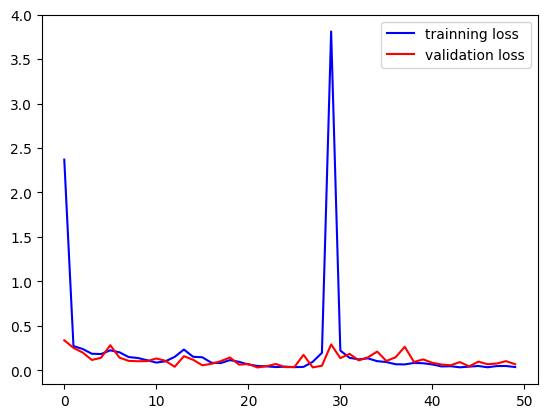

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [ ]:
model.save("drowiness.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

prep_size = 244
def prepare(filepath, face_cas=f"/content/drive/MyDrive/Colab Notebooks/Driver drowsiness/utils/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (prep_size, prep_size))
    return resized_array.reshape(-1, prep_size, prep_size, 3)

model = tf.keras.models.load_model("./drowiness.h5")

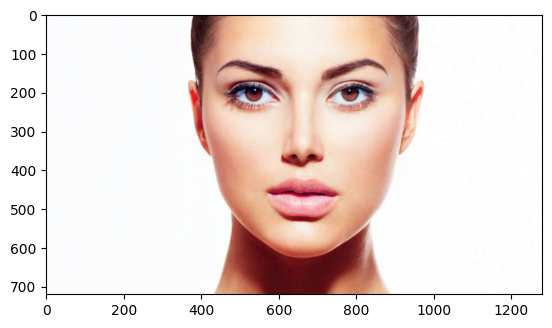

In [ ]:
plt.imshow(plt.imread("/content/drive/MyDrive/Colab Notebooks/Driver drowsiness/test/test.jpg"))

In [ ]:
def detect_and_crop_eyes(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    eye_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/Colab Notebooks/Driver drowsiness/utils/haarcascade.xml")  # Replace with the path to your downloaded file

    eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    # Iterate through detected eyes and crop them
    for (x, y, w, h) in eyes:
        eye_roi = image[y:y + h, x:x + w]

        img_array = cv2.resize(eye_roi, (IMG_SHAPE[0], IMG_SHAPE[1]))
        img_array = img_array / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Make prediction
        prediction = model.predict(img_array)
        print(prediction)
        class_index = np.argmax(prediction)
        print(labels[class_index])


In [ ]:
eyes = detect_and_crop_eyes("/content/drive/MyDrive/Colab Notebooks/Driver drowsiness/test/test.jpg")

1/1 [==============================] - 0s 18ms/step
[[0.061992   0.93800795]]
Open
1/1 [==============================] - 0s 19ms/step
[[0.0086097 0.9913902]]
Open
